In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [136]:
df = pd.read_csv('Salaries (1).csv')

In [137]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [138]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [385]:
df['Year'].value_counts()

Year
2014    38123
2013    37606
2012    36766
2011    36159
Name: count, dtype: int64

In [386]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [387]:
wdata = df[df['Year'].isin([2013,2014])]

In [388]:
wdata = wdata.drop(['Notes','Status'], axis = 1)

In [389]:
wdata[wdata['BasePay'].isna()==1]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
81391,81392,Kevin P Cashman,Deputy Chief 3,NaN,0.0,149934.11,0.00,149934.11,149934.11,2013,San Francisco
84506,84507,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.00,110485.41,131264.41,2013,San Francisco
84960,84961,Michael M Horan,Park Patrol Officer,NaN,0.0,120000.00,8841.48,120000.00,128841.48,2013,San Francisco
90525,90526,Thomas Tang,Police Officer 3,NaN,0.0,106079.31,0.00,106079.31,106079.31,2013,San Francisco
90786,90787,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
110530,110531,David P Kucia,Police Officer 3,NaN,0.0,0.00,-33.89,0.00,-33.89,2013,San Francisco
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco


In [390]:
wdata[wdata['EmployeeName']=='Not provided']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco


In [391]:
wdata = wdata.drop(wdata[wdata.TotalPayBenefits < 1].index)

In [392]:
wdata

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
72925,72926,Gregory P Suhr,Chief of Police,319275.01,0.00,20007.06,86533.21,339282.07,425815.28,2013,San Francisco
72926,72927,Joanne M Hayes-White,"Chief, Fire Department",313686.01,0.00,23236.00,85431.39,336922.01,422353.40,2013,San Francisco
72927,72928,Samson Lai,"Battalion Chief, Fire Suppress",186236.42,131217.63,29648.27,57064.95,347102.32,404167.27,2013,San Francisco
72928,72929,Ellen G Moffatt,Asst Med Examiner,272855.51,23727.91,38954.54,66198.92,335537.96,401736.88,2013,San Francisco
72929,72930,Robert L Shaw,"Dep Dir for Investments, Ret",315572.01,0.00,0.00,82849.66,315572.01,398421.67,2013,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148621,148622,Kenneth Mackey,Transit Operator,0.00,0.00,15.35,0.00,15.35,15.35,2014,San Francisco
148622,148623,Jacqueline Hubbard,Senior Clerk,0.00,0.00,13.77,0.00,13.77,13.77,2014,San Francisco
148623,148624,Deborah B Honig,Attorney (Civil/Criminal),0.00,0.00,13.35,0.13,13.35,13.48,2014,San Francisco
148624,148625,Lorraine Rosenthal,Senior Clerk,0.00,0.00,12.89,0.00,12.89,12.89,2014,San Francisco


In [393]:
wdata.shape

(75698, 11)

In [394]:
wdata[wdata.duplicated()== True]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency


In [92]:
wdata.isna().sum()

Id                    0
EmployeeName          0
JobTitle              0
BasePay             602
OvertimePay           0
OtherPay              0
Benefits              0
TotalPay              0
TotalPayBenefits      0
Year                  0
Agency                0
dtype: int64

In [395]:
wdata.reset_index(drop =True)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,72926,Gregory P Suhr,Chief of Police,319275.01,0.00,20007.06,86533.21,339282.07,425815.28,2013,San Francisco
1,72927,Joanne M Hayes-White,"Chief, Fire Department",313686.01,0.00,23236.00,85431.39,336922.01,422353.40,2013,San Francisco
2,72928,Samson Lai,"Battalion Chief, Fire Suppress",186236.42,131217.63,29648.27,57064.95,347102.32,404167.27,2013,San Francisco
3,72929,Ellen G Moffatt,Asst Med Examiner,272855.51,23727.91,38954.54,66198.92,335537.96,401736.88,2013,San Francisco
4,72930,Robert L Shaw,"Dep Dir for Investments, Ret",315572.01,0.00,0.00,82849.66,315572.01,398421.67,2013,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
75693,148622,Kenneth Mackey,Transit Operator,0.00,0.00,15.35,0.00,15.35,15.35,2014,San Francisco
75694,148623,Jacqueline Hubbard,Senior Clerk,0.00,0.00,13.77,0.00,13.77,13.77,2014,San Francisco
75695,148624,Deborah B Honig,Attorney (Civil/Criminal),0.00,0.00,13.35,0.13,13.35,13.48,2014,San Francisco
75696,148625,Lorraine Rosenthal,Senior Clerk,0.00,0.00,12.89,0.00,12.89,12.89,2014,San Francisco


In [396]:
wdata = wdata.rename(columns={'Id' : 'id',
                              'EmployeeName' : 'employee_name',
                              'JobTitle' : 'job_title',
                              'BasePay' : 'base_pay',
                              'OvertimePay' : 'overtime_pay',
                              'OtherPay' : 'other_pay',
                              'Benefits' : 'benefits',
                              'TotalPay' : 'total_pay', 
                              'TotalPayBenefits' : 'total_pay_benefits',
                              'Agency' : 'agency',
                              'Year' : 'year'
                             })

In [397]:
wdata.head()

,id,employee_name,job_title,base_pay,overtime_pay,other_pay,benefits,total_pay,total_pay_benefits,year,agency
72925,72926,Gregory P Suhr,Chief of Police,319275.01,0.00,20007.06,86533.21,339282.07,425815.28,2013,San Francisco
72926,72927,Joanne M Hayes-White,"Chief, Fire Department",313686.01,0.00,23236.00,85431.39,336922.01,422353.40,2013,San Francisco
72927,72928,Samson Lai,"Battalion Chief, Fire Suppress",186236.42,131217.63,29648.27,57064.95,347102.32,404167.27,2013,San Francisco
72928,72929,Ellen G Moffatt,Asst Med Examiner,272855.51,23727.91,38954.54,66198.92,335537.96,401736.88,2013,San Francisco
72929,72930,Robert L Shaw,"Dep Dir for Investments, Ret",315572.01,0.00,0.00,82849.66,315572.01,398421.67,2013,San Francisco


In [398]:
wdata['base_pay'].mean()

68096.16953472888

In [399]:
wdata['overtime_pay'].max()

196689.18

In [400]:
wdata[wdata['total_pay_benefits'] == wdata['total_pay_benefits'].max()]

,id,employee_name,job_title,base_pay,overtime_pay,other_pay,benefits,total_pay,total_pay_benefits,year,agency
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,2014,San Francisco


In [401]:
wdata[wdata['total_pay_benefits'] == wdata['total_pay_benefits'].min()]

,id,employee_name,job_title,base_pay,overtime_pay,other_pay,benefits,total_pay,total_pay_benefits,year,agency
110527,110528,Nereida Vega,Senior Clerk,NaN,0.0,5.56,0.0,5.56,5.56,2013,San Francisco


In [402]:
wdata.groupby('year').mean(['base_pay'])['base_pay']

year
2013    69630.030216
2014    66606.357772
Name: base_pay, dtype: float64

C:\Users\Felhasznalo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felhasznalo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


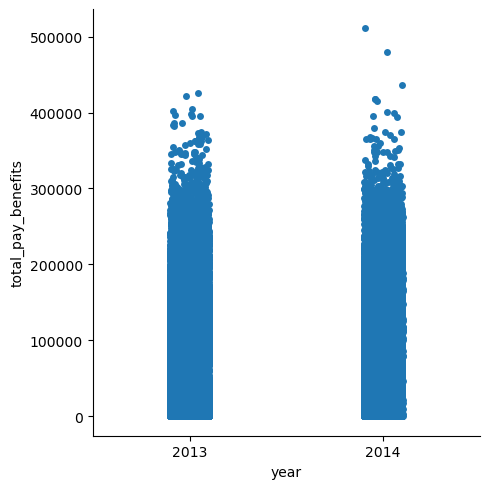

In [218]:
sns.catplot(x='year', y = 'total_pay_benefits',data=wdata)

C:\Users\Felhasznalo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felhasznalo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


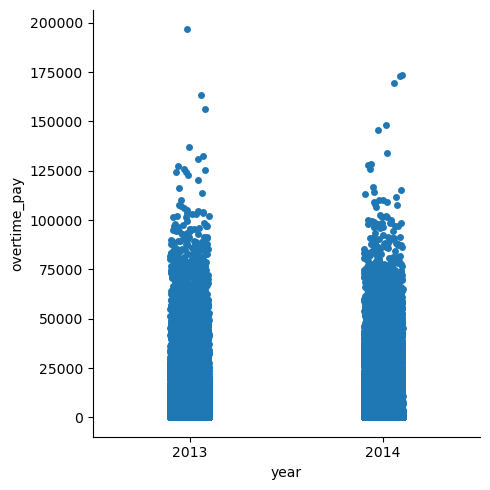

In [403]:
sns.catplot(x='year', y = 'overtime_pay',data=wdata)

In [404]:
wdata['job_title'].value_counts().head()

job_title
Transit Operator                4774
Special Nurse                   2923
Registered Nurse                2465
Public Svc Aide-Public Works    1775
Firefighter                     1600
Name: count, dtype: int64

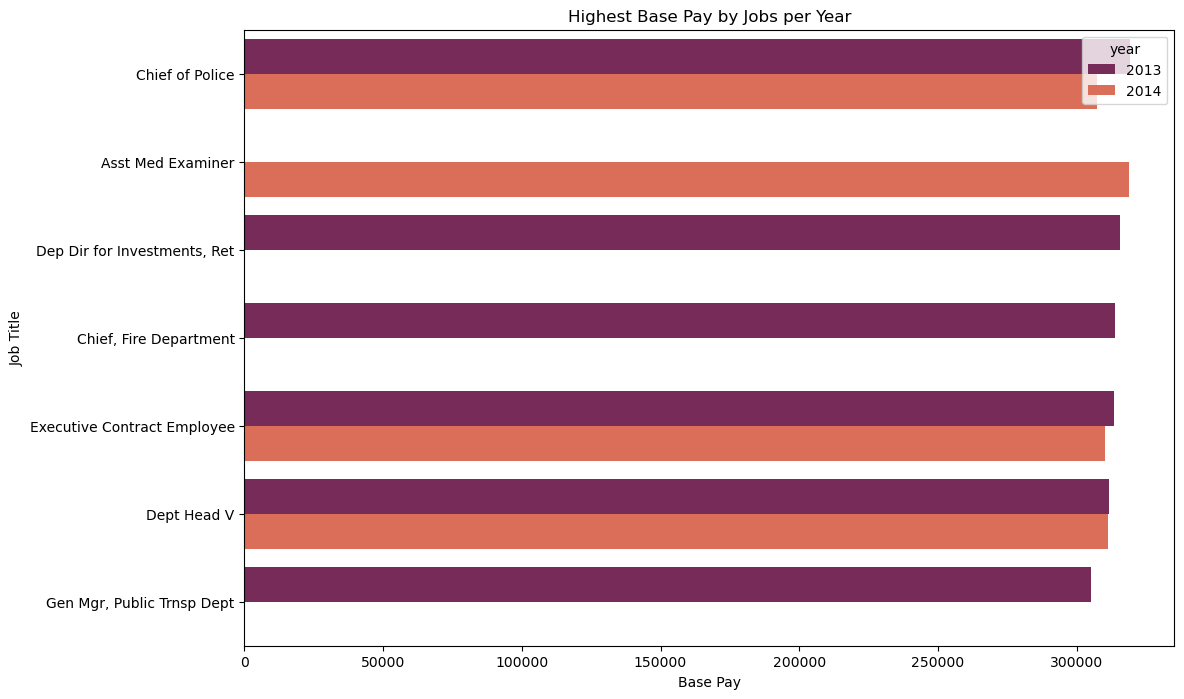

In [405]:
df1 = wdata.groupby(['job_title', 'year'])['base_pay'].max().reset_index()
df1 = df1.sort_values(by='base_pay', ascending=False).head(10)
df1['year'] = df1['year'].astype(str)

plt.figure(figsize=(12, 8))
sns.barplot(x='base_pay', y='job_title', hue='year', data= df1,errorbar = None, palette= 'rocket')
plt.xlabel('Base Pay')
plt.ylabel('Job Title')
plt.title('Highest Base Pay by Jobs per Year')
plt.show()

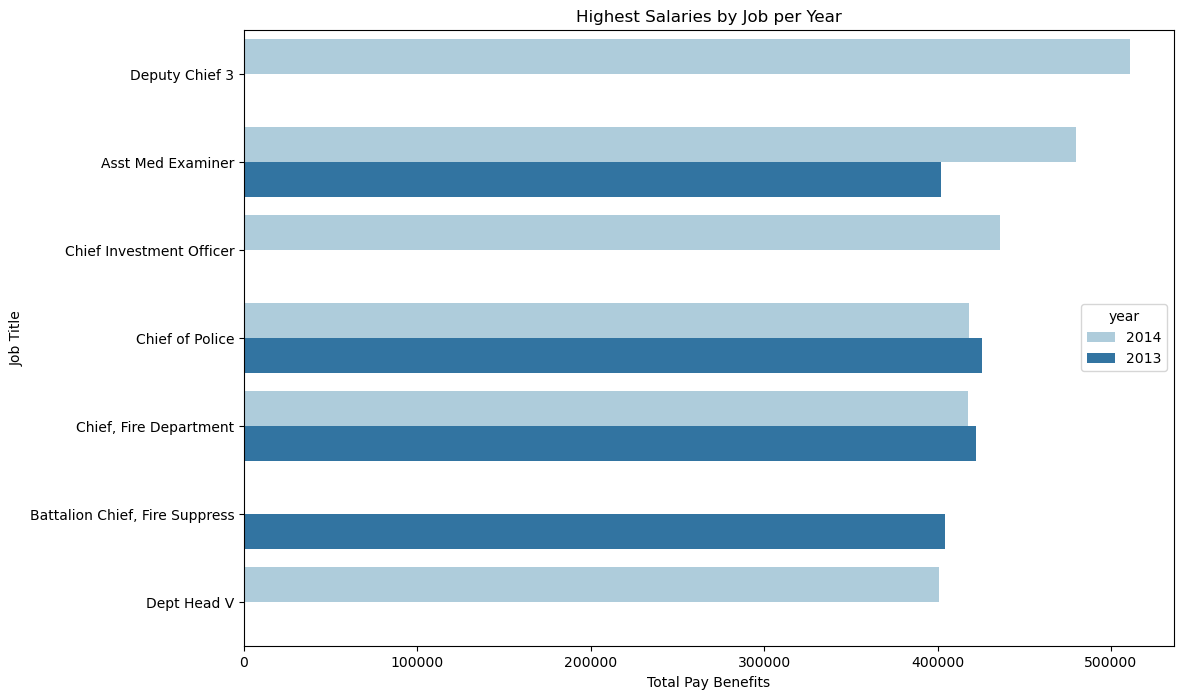

In [406]:
df1 = wdata.groupby(['job_title', 'year'])['total_pay_benefits'].max().reset_index()
df1 = df1.sort_values(by='total_pay_benefits', ascending=False).head(10)
df1['year'] = df1['year'].astype(str)

plt.figure(figsize=(12, 8))
sns.barplot(x='total_pay_benefits', y='job_title', hue='year', data= df1,errorbar = None, palette= 'Paired')
plt.xlabel('Total Pay Benefits')
plt.ylabel('Job Title')
plt.title('Highest Salaries by Job per Year')
plt.show()

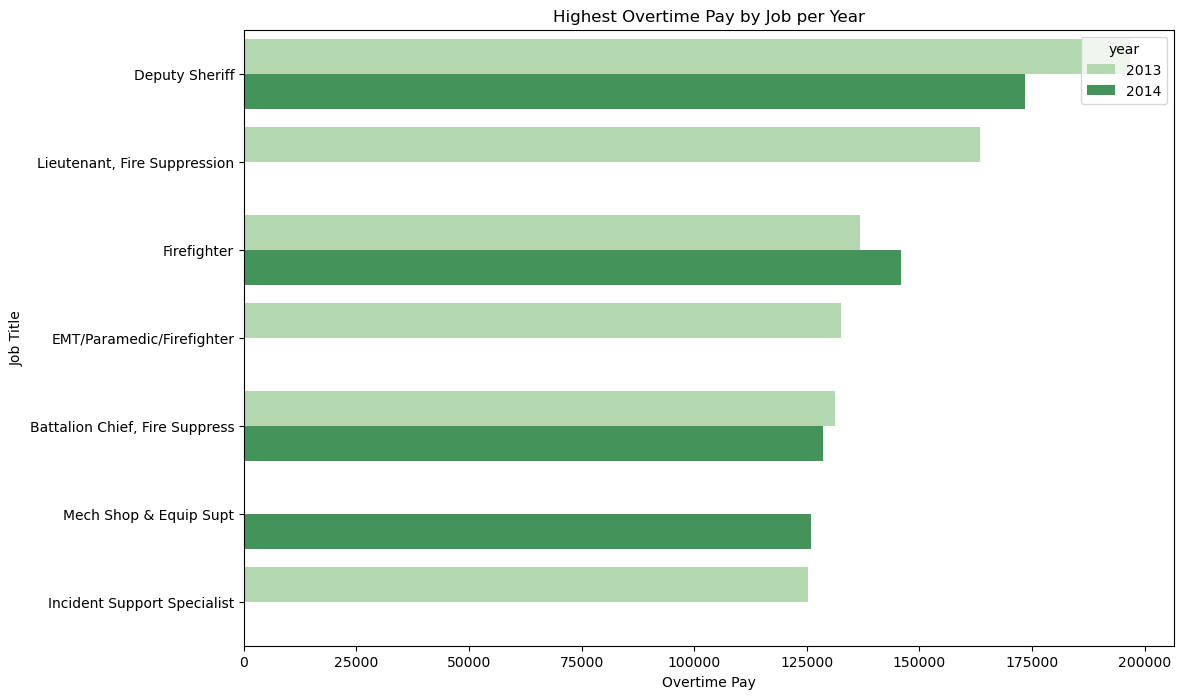

In [407]:
df1 = wdata.groupby(['job_title', 'year'])['overtime_pay'].max().reset_index()
df1 = df1.sort_values(by='overtime_pay', ascending=False).head(10)
df1['year'] = df1['year'].astype(str)

plt.figure(figsize=(12, 8))
sns.barplot(x='overtime_pay', y='job_title', hue='year', data= df1,errorbar = None, palette= 'Greens')
plt.xlabel('Overtime Pay')
plt.ylabel('Job Title')
plt.title('Highest Overtime Pay by Job per Year')
plt.show()

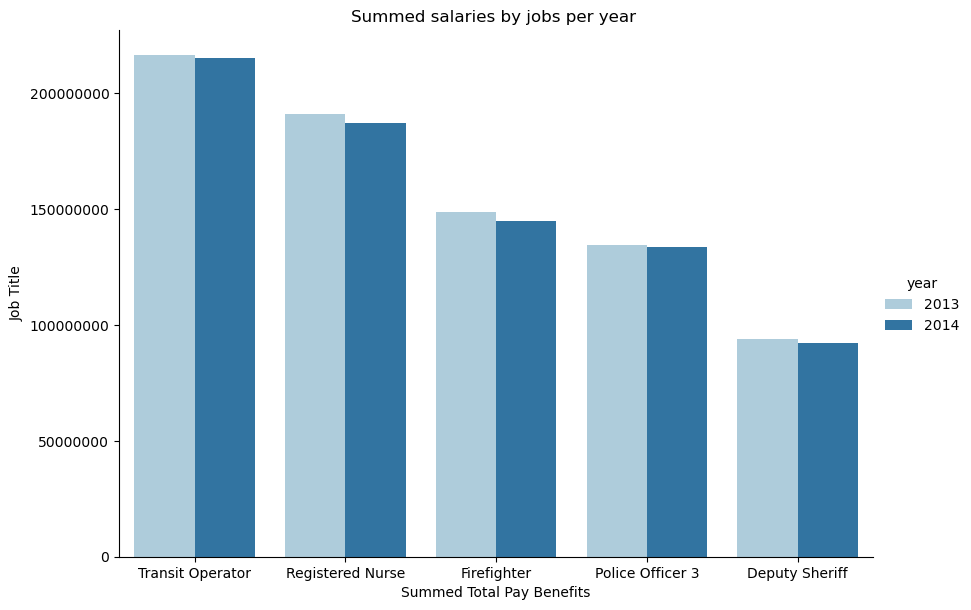

In [408]:
df2 = wdata.groupby(['job_title', 'year'])['total_pay_benefits'].sum().reset_index()
df2 = df2.sort_values(by='total_pay_benefits', ascending=False).head(10)
df2['year'] = df2['year'].astype(str)
sns.catplot(x='job_title', y='total_pay_benefits', data=df2 , hue= 'year',kind = 'bar',height=6, aspect=1.5,errorbar = None,palette='Paired')
plt.xlabel('Summed Total Pay Benefits')
plt.ylabel('Job Title')
plt.title('Summed salaries by jobs per year ')
plt.rcParams['axes.formatter.limits'] = (-99, 99)
#plt.xticks(rotation=45)
plt.show()

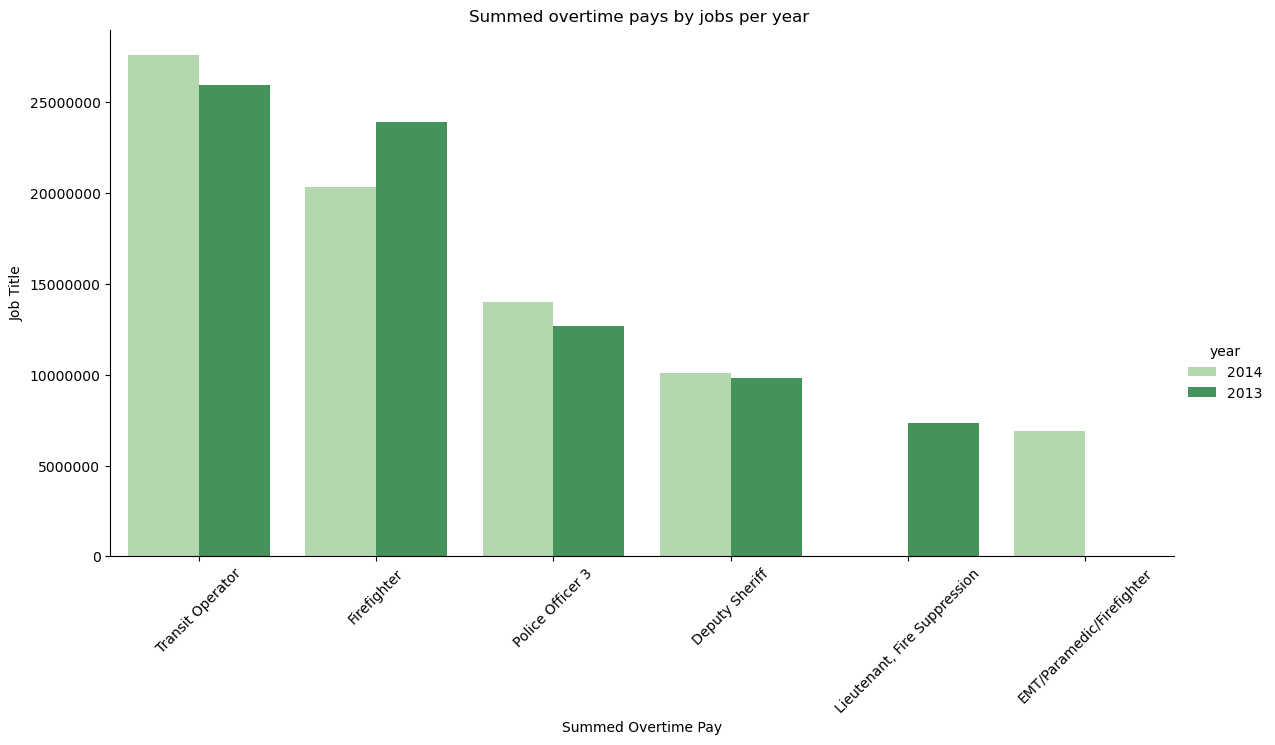

In [409]:
df2 = wdata.groupby(['job_title', 'year'])['overtime_pay'].sum().reset_index()
df2 = df2.sort_values(by='overtime_pay', ascending=False).head(10)
df2['job_title'] = df2['job_title'].astype(str)
df2['year'] = df2['year'].astype(str)
sns.catplot(x='job_title', y='overtime_pay', data=df2 , hue= 'year',kind = 'bar',height=6, aspect=2,errorbar = None,palette='Greens')
plt.xlabel('Summed Overtime Pay')
plt.ylabel('Job Title')
plt.title('Summed overtime pays by jobs per year ')
plt.rcParams['axes.formatter.limits'] = (-99, 99)
plt.xticks(rotation=45)
plt.show()

In [410]:
dataw = wdata.groupby('year')['total_pay_benefits'].sum()
dataw

year
2013    3.814772e+09
2014    3.821866e+09
Name: total_pay_benefits, dtype: float64

In [411]:
wdata.query('year == 2013').groupby('job_title')['total_pay_benefits'].agg(['mean','count']).sort_values('mean',ascending = False).query('count>200').head(5)

,mean,count
job_title,,
Sergeant 3,209464.002604,361
Firefighter,189413.720064,785
Attorney (Civil/Criminal),182630.164232,371
Police Officer 2,177992.585509,383
EMT/Paramedic/Firefighter,176276.622795,297


In [412]:
wdata.query('year == 2013').groupby('job_title')['total_pay_benefits'].agg(['mean','count']).sort_values('mean',ascending = False).query('count<5').head(5)

,mean,count
job_title,,
Chief of Police,425815.28,1
"Chief, Fire Department",422353.40,1
"Dep Dir for Investments, Ret",398421.67,1
"Gen Mgr, Public Trnsp Dept",386168.49,1
Dep Chf of Dept (Fire Dept),370406.32,2
